In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import batman
from scipy import optimize

In [22]:
true_R_star = 1.23 #R_sun
true_R_planet = 0.78 #R_J
true_semi_major_axis = 0.034 #AU 


params = batman.TransitParams()
params.t0 = 0.                                          #time of inferior conjunction
params.per = 3.3                                        #orbital period (days)
params.rp = true_R_star * 0.10045 #R_Sun                #planet radius (in units of stellar radii)
params.a = (true_semi_major_axis * 215.032) / true_R_planet  #semi-major axis (in units of stellar radii))
params.inc = 89.1                                       #orbital inclination (in degrees)
params.ecc = 0.                                         #eccentricity
params.w = 90.                                          #longitude of periastron (in degrees)
params.limb_dark = "quadratic"                          #limb darkening model
params.u = [0.3423, 0.2939]                             #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.12, 0.12, 1000)                      #times at which to calculate light curve
m = batman.TransitModel(params, t)                      #initializes model
true_flux = m.light_curve(params)

In [23]:
print(params.rp)

0.1235535


In [24]:
sigma = 0.001
errs = np.random.normal(loc=0., scale=sigma, size=len(true_flux))
true_flux += errs

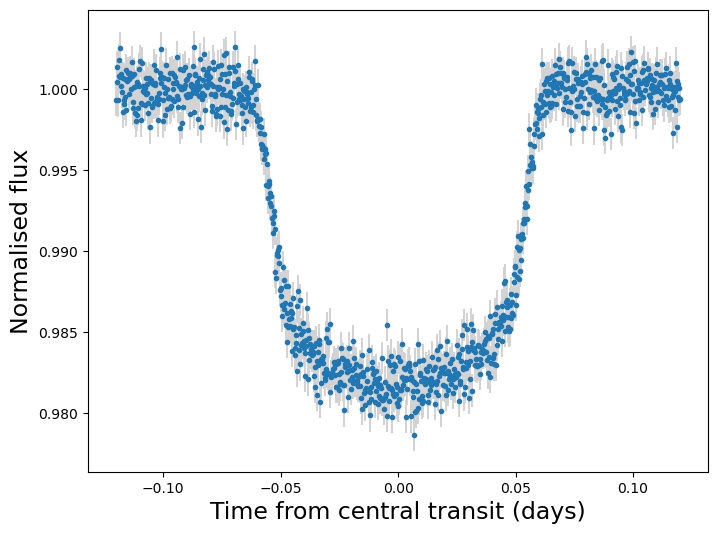

In [25]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.errorbar(t, true_flux, yerr=sigma, fmt='.', ecolor='LightGrey', label="Expected")
plt.xlabel("Time from central transit (days)", size=17)
plt.ylabel("Normalised flux", size=17)
plt.show()

In [26]:
R_star = true_R_star #R_sun
R_planet = true_R_planet #R_J
semi_major_axis = 0.034 #AU 


guess_params = batman.TransitParams()
guess_params.t0 = 0.                                          #time of inferior conjunction
guess_params.per = 3.3
guess_params.rp = R_planet * 0.10045 #R_Sun#
guess_params.a = (semi_major_axis * 215.032) / R_star         #semi-major axis (in units of stellar radii))

guess_params.ecc = 0.                                         #eccentricity
guess_params.w = 90.                                          #longitude of periastron (in degrees)
guess_params.limb_dark = "quadratic"                          #limb darkening model
guess_params.u = [0.3423, 0.2939]                             #limb darkening coefficients [u1, u2, u3, u4]


In [27]:
def log_likelihood(params):
    orbital_inclination = params

    
    #guess_params.rp = R_planet * 0.10045 #R_Sun#
    guess_params.inc = orbital_inclination
    
    guess_m = batman.TransitModel(guess_params, t) 

    guess_flux = guess_m.light_curve(guess_params)
        
    L = 0
    for y_i, y_m_i in zip(guess_flux, true_flux):
        L += (-0.5 * ((y_i - y_m_i)**2 / sigma**2))
    L = L + (len(t) / 2) * np.log(2 * np.pi * sigma**2) 

    return L

def log_prior(params):
    model_m, model_c = params

    P = 0.
    if model_m > 30:
        P += -np.inf 

    return P

def log_prob(params):
    return -(log_likelihood(params))# + log_prior(params))

In [28]:
guess = [87]

likelihood_model = optimize.minimize(log_prob, guess)#, method='Nelder-Mead'
model_orbital_inclination = (likelihood_model['x'])
print(likelihood_model)

      fun: 30539.355367903045
 hess_inv: array([[0.00314176]])
      jac: array([-0.00024414])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 61
      nit: 6
     njev: 27
   status: 2
  success: False
        x: array([85.67790126])


In [29]:
model_paramas = batman.TransitParams()

R_star = 1.23 #R_J

model_params = batman.TransitParams()
model_params.t0 = 0.                                          #time of inferior conjunction
model_params.per = 3.3                                              #orbital period (days)
model_params.rp = true_R_star * 0.10045 #R_Sun                      #planet radius (in units of stellar radii)
model_params.a = (semi_major_axis * 215.032) / true_R_star         #semi-major axis (in units of stellar radii))
model_params.inc = 89.1                                       #orbital inclination (in degrees)
model_params.ecc = 0.                                         #eccentricity
model_params.w = 90.                                          #longitude of periastron (in degrees)
model_params.limb_dark = "quadratic"                          #limb darkening model
model_params.u = [0.3423, 0.2939]                             #limb darkening coefficients [u1, u2, u3, u4]


model_m = batman.TransitModel(model_params, t)                      #initializes model
model_flux = model_m.light_curve(model_params)

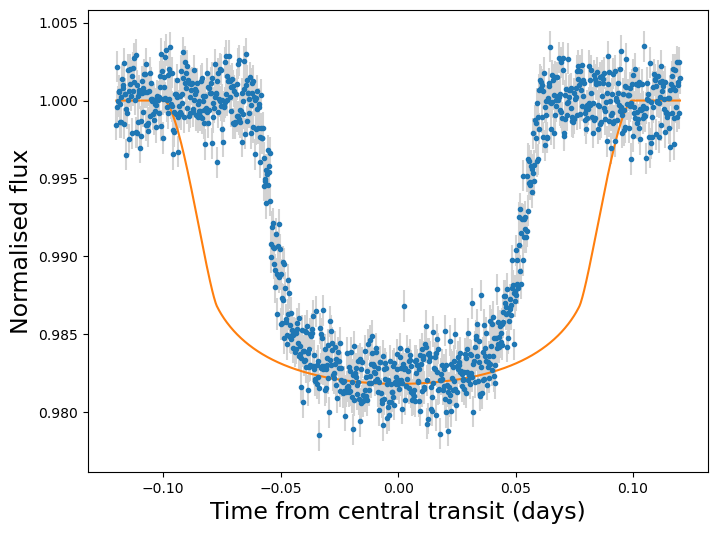

In [30]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.errorbar(t, flux, yerr=sigma, fmt='.', ecolor='LightGrey', label="Expected")
plt.plot(t, model_flux)

plt.xlabel("Time from central transit (days)", size=17)
plt.ylabel("Normalised flux", size=17)
plt.show()